# CAR PRICE PREDICTION

**We get data from the car website CarDekho.com, filled with information on a wide variety of cars, including their selling price and present price. We realize that we can use this data to make sure we get a good deal on a new car. In particular, we can figure out exactly how much one should pay for a specific type of car.** 

## Reading and Understanding the Data

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import warnings
warnings.simplefilter(action='ignore')

pd.set_option("display.max_rows", None,"display.max_columns", None)

In [2]:
df=pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Above is a concise summary of our dataframe printing Columns, Data-type, Index, Data-type and Number of Non-null values !

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


We have an analysis of our Numerical columns which gives us the count, mean,bstd and other such values to have a clear idea of the values in our dataset. Helps in scaling !

In [6]:
#Missing Values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

We have no missing/null values in our dataset !

## Data Preprocessing

In [7]:
#Age of the car
#Current Year = 2022
df['Age']=2022-df['Year']
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0,8
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0,4
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0,7
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0,7
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0,6
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0,7


Here the Selling Price and Present Price are in lakhs and the Owner column represents number of Past Owners of the car. Let's represent them accordingly.

In [8]:
df.rename(columns={'Selling_Price':'Selling_Price(lakhs)', 'Present_Price':'Present_Price(lakhs)', 'Owner':'Past_Owners'}, inplace = True)

In [9]:
df.drop('Year', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [10]:
columns = df.columns
columns

Index(['Car_Name', 'Selling_Price(lakhs)', 'Present_Price(lakhs)',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners',
       'Age'],
      dtype='object')

In [11]:
categorical_columns=['Fuel_Type', 'Seller_Type', 'Transmission']

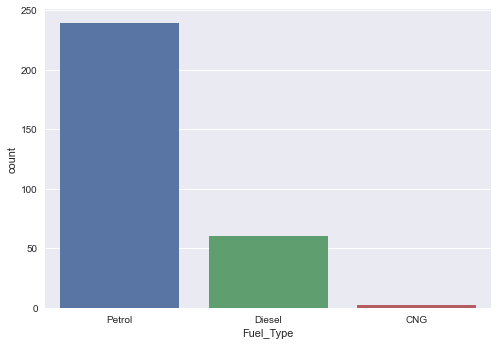

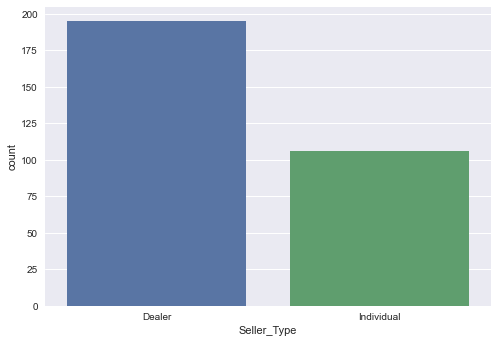

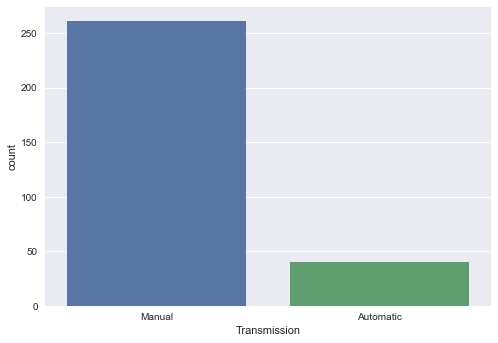

In [12]:
i=0
while i < 3:
    sns.countplot(x=categorical_columns[i], data=df)
    i=i+1
    plt.show()

* Cars with Fuel Type Petrol are the highest while that of CNG are the lowest
* Dealers are higher in number monitoring the selling of cars as compared to individuals
* Cars with Manual Transmission are higher in number as compared to Automatic Transmission

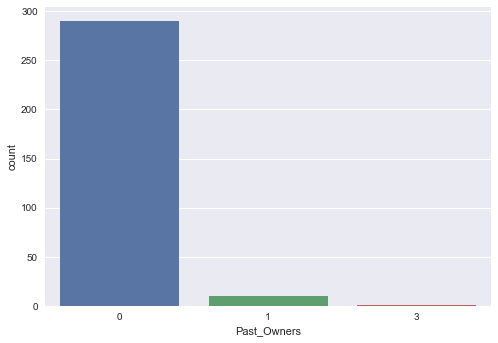

In [13]:
sns.countplot(x='Past_Owners', data=df)
plt.show()

There are more number of cars with 0 Past Owners !

In [14]:
numeric_columns=['Selling_Price(lakhs)', 'Present_Price(lakhs)', 'Kms_Driven', 'Age']

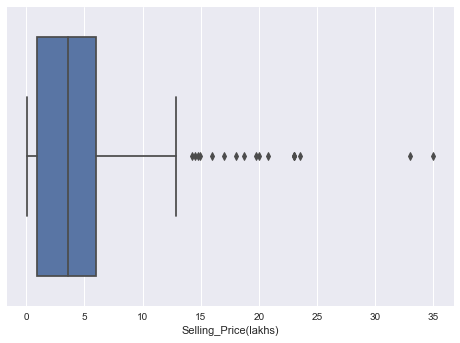

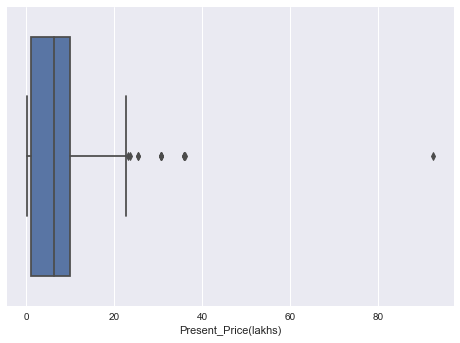

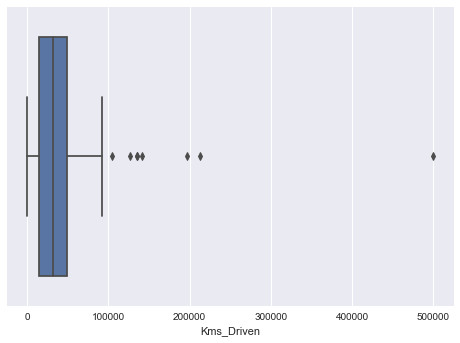

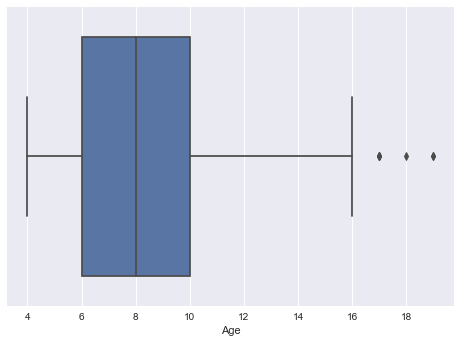

In [15]:
i=0
while i < 4:
    sns.boxplot(x=numeric_columns[i], data=df)
    i=i+1
    plt.show()

In [16]:
df[df['Present_Price(lakhs)'] > df['Present_Price(lakhs)'].quantile(0.99)]

,Car_Name,Selling_Price(lakhs),Present_Price(lakhs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,5
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,12


In [17]:
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lakhs),Present_Price(lakhs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,17
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,12
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,14


In [18]:
df[df['Selling_Price(lakhs)'] > df['Selling_Price(lakhs)'].quantile(0.99)]

,Car_Name,Selling_Price(lakhs),Present_Price(lakhs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,7
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,5
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,12


### Bivariate Analysis

#### Owner Type
Let's examine the relation between the Selling Price and the  Past Owners

<AxesSubplot:xlabel='Past_Owners', ylabel='Selling_Price(lakhs)'>

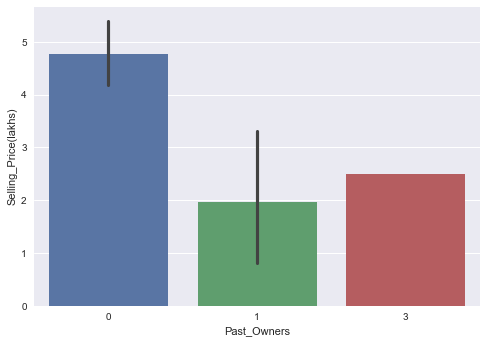

In [19]:
sns.barplot(x='Past_Owners',y='Selling_Price(lakhs)',data=df)

Looks like the vehicles belonging to owner 0 have the highest selling price!

#### Transmission Type
Let's examine the relation between the Selling Price and the Transmission Type

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price(lakhs)'>

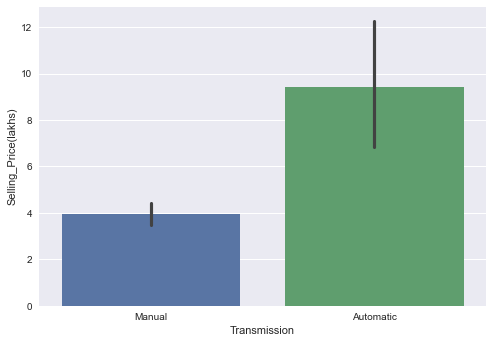

In [20]:
sns.barplot(x='Transmission',y='Selling_Price(lakhs)',data=df)

Automatic vehicles are found to have a large resale value in the market compared to Manual transmission!

#### Fuel Type
Let's examine the relation between the Selling Price and the Fuel Type

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price(lakhs)'>

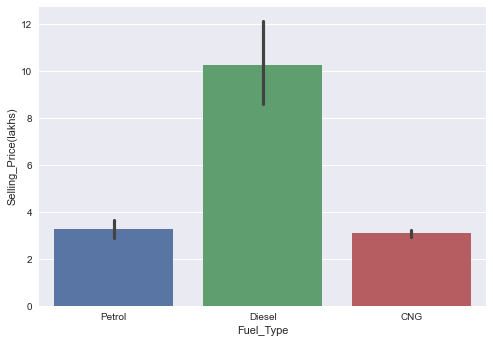

In [21]:
sns.barplot(x='Fuel_Type',y='Selling_Price(lakhs)',data=df)

Diesel Engine Vehicles are found to have the highest selling price amongst Petrol and CNG engine vehicles!

#### Seller Type
Let's examine the relation between the Selling Price and the Seller Type

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price(lakhs)'>

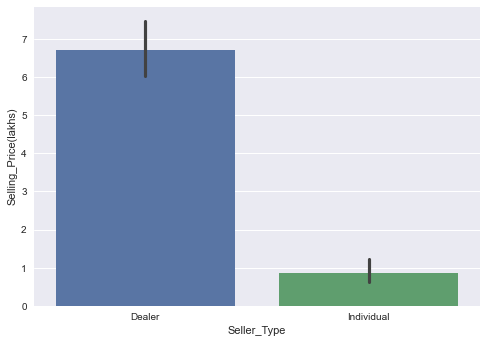

In [22]:
sns.barplot(x='Seller_Type',y='Selling_Price(lakhs)',data=df)

Dealers can sell vehicles at a higher selling price than a general individual. No surprises!

#### Kms Driven
Let's examine the relation between the Selling Price and the Kms Driven

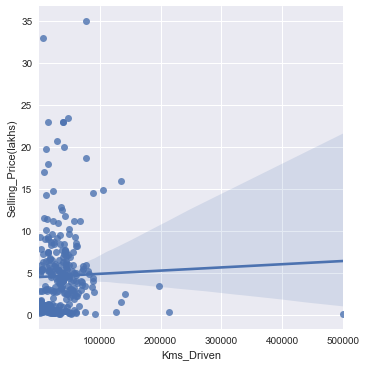

In [23]:
sns.lmplot(x='Kms_Driven',y='Selling_Price(lakhs)',data=df)

The selling price is found to be higher for vehicles with less kms covered!

#### Present Price
Let's examine the relation between the Selling Price and the Present Price

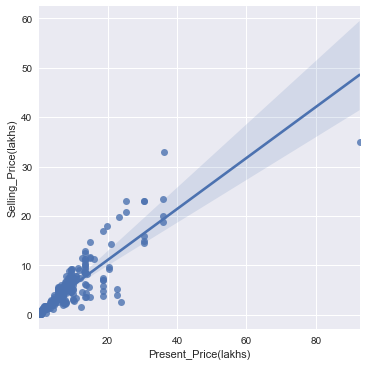

In [24]:
sns.lmplot(x='Present_Price(lakhs)',y='Selling_Price(lakhs)',data=df)

Selling Price tends to increase gradually with an increase in the Present Price of the vehicle

#### Age
Let's examine the relation between the Selling Price and the Age of the Vehicle

<AxesSubplot:xlabel='Age', ylabel='Selling_Price(lakhs)'>

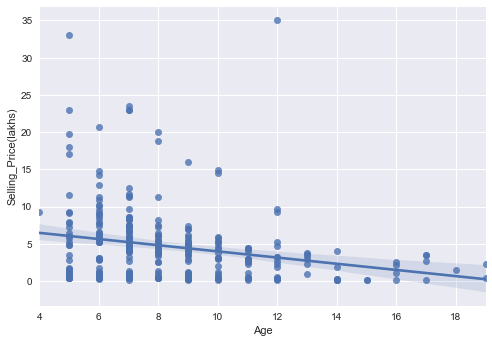

In [25]:
sns.regplot(x='Age',y='Selling_Price(lakhs)',data=df)

The selling price decreases overall for older/ageing vehicles !

## Feature Engineering

We will toss out the Car_Name column from training and test data because it only has text info that the linear regression model can't use!

In [26]:
df.drop('Car_Name', axis=1, inplace=True)

In [27]:
df.head()

,Selling_Price(lakhs),Present_Price(lakhs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


#### Encoding Categorical Columns

In [28]:
df=pd.get_dummies(data=df,columns=['Fuel_Type', 'Transmission', 'Seller_Type'], drop_first=True)
df.head()

,Selling_Price(lakhs),Present_Price(lakhs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,3.35,5.59,27000,0,8,0,1,1,0
1,4.75,9.54,43000,0,9,1,0,1,0
2,7.25,9.85,6900,0,5,0,1,1,0
3,2.85,4.15,5200,0,11,0,1,1,0
4,4.60,6.87,42450,0,8,1,0,1,0


* Fuel attribute is now divided into two new attributes where '01' denotes Petrol, '10' denotes Diesel and '00' denotes CNG.
* Transmission attribute is mapped to Transmission_Manual where '1' denotes Manual and '0' Automatic.
* Seller_Type attribute is mapped to Seller_Type_Individual where '1' denotes Seller_Type_Dealer  and '0' Seller_Type_Individual.

###  Visualizing Correlations amongst the features

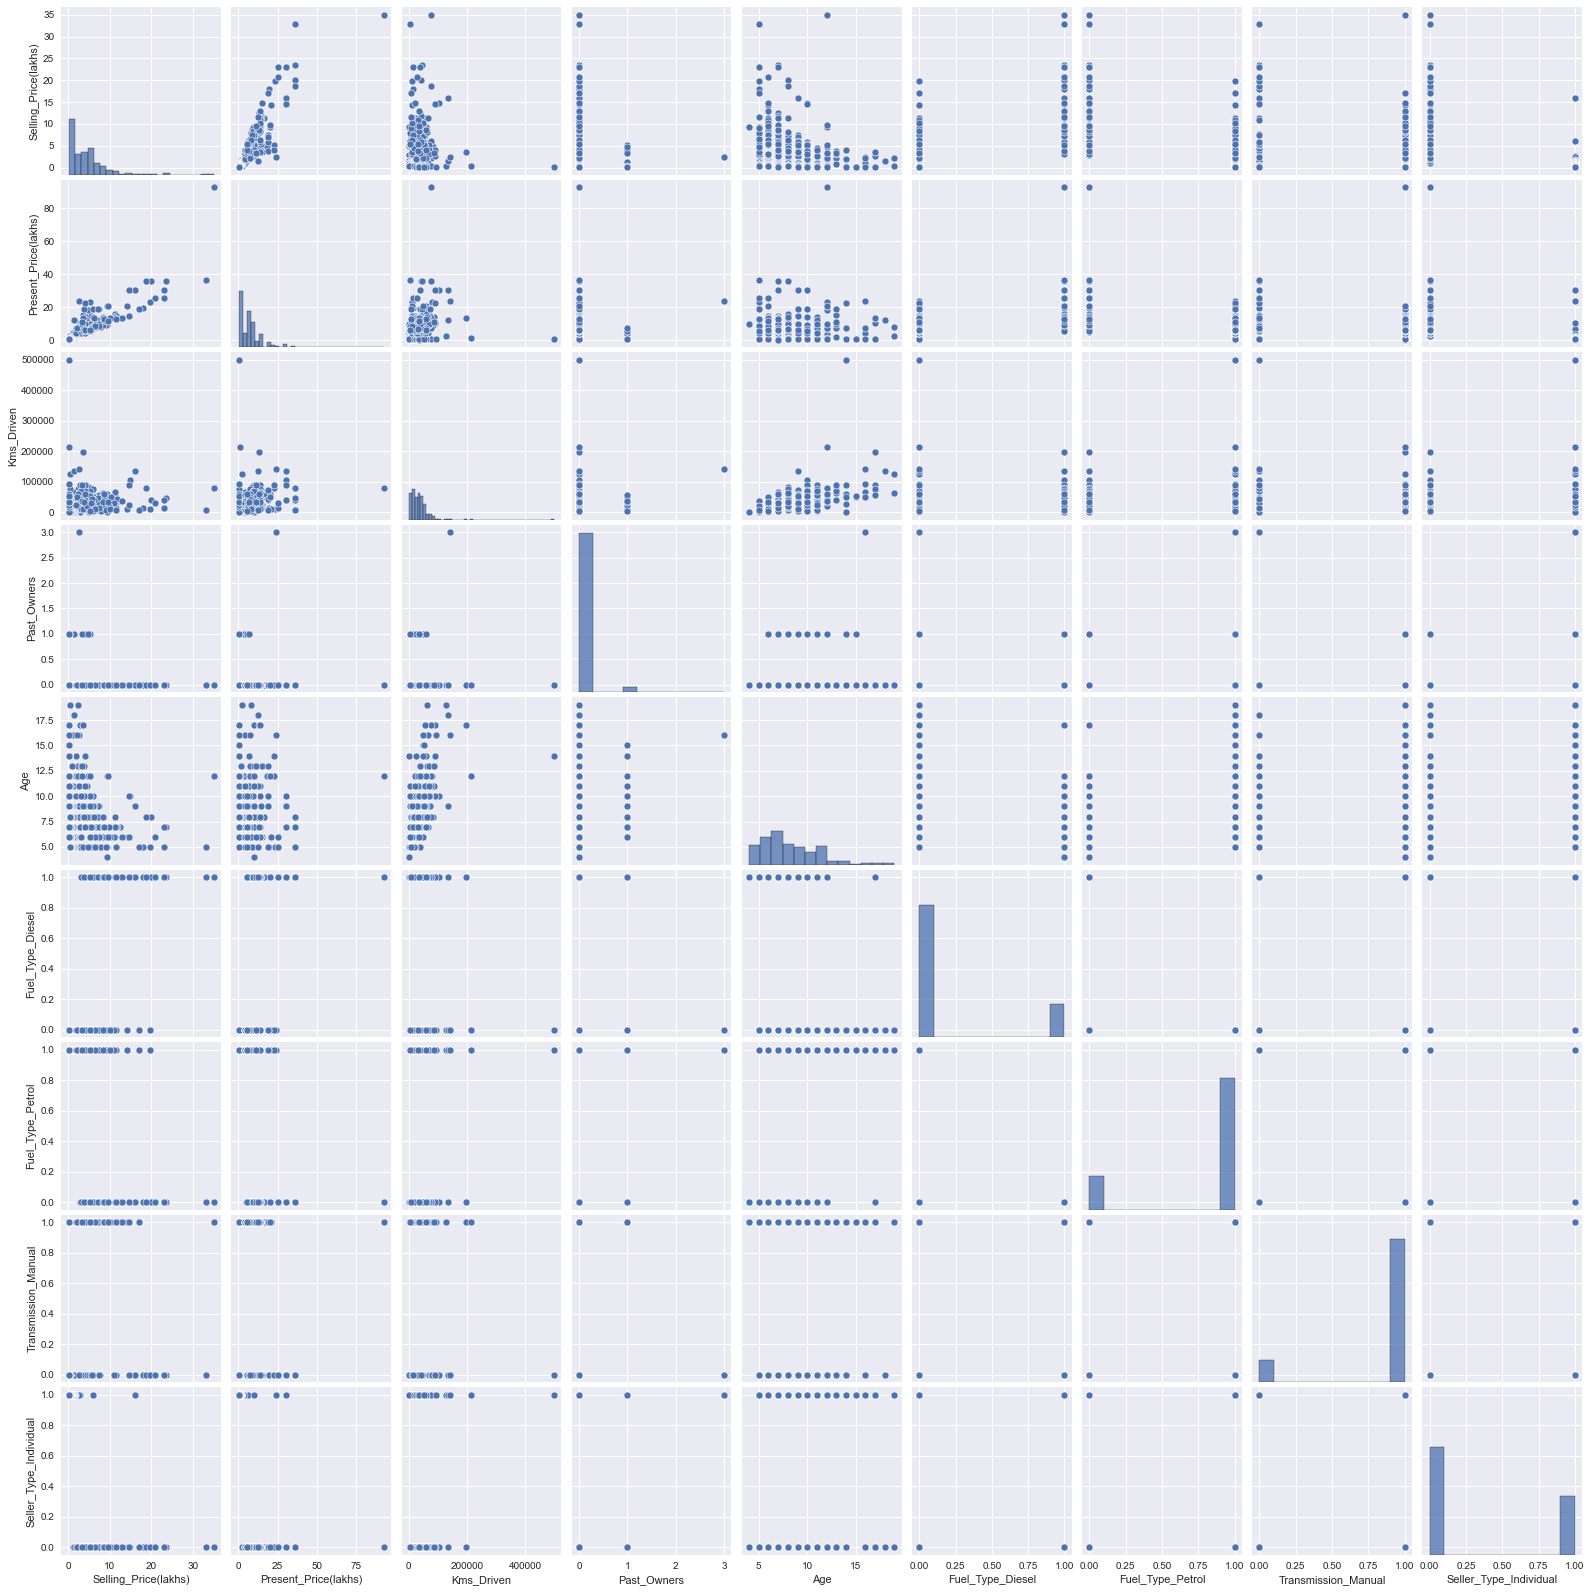

In [29]:
sns.pairplot(df)

Selling price seems to be considerably correlated with the Present Price feature.

### Correlation HeatMap

<AxesSubplot:>

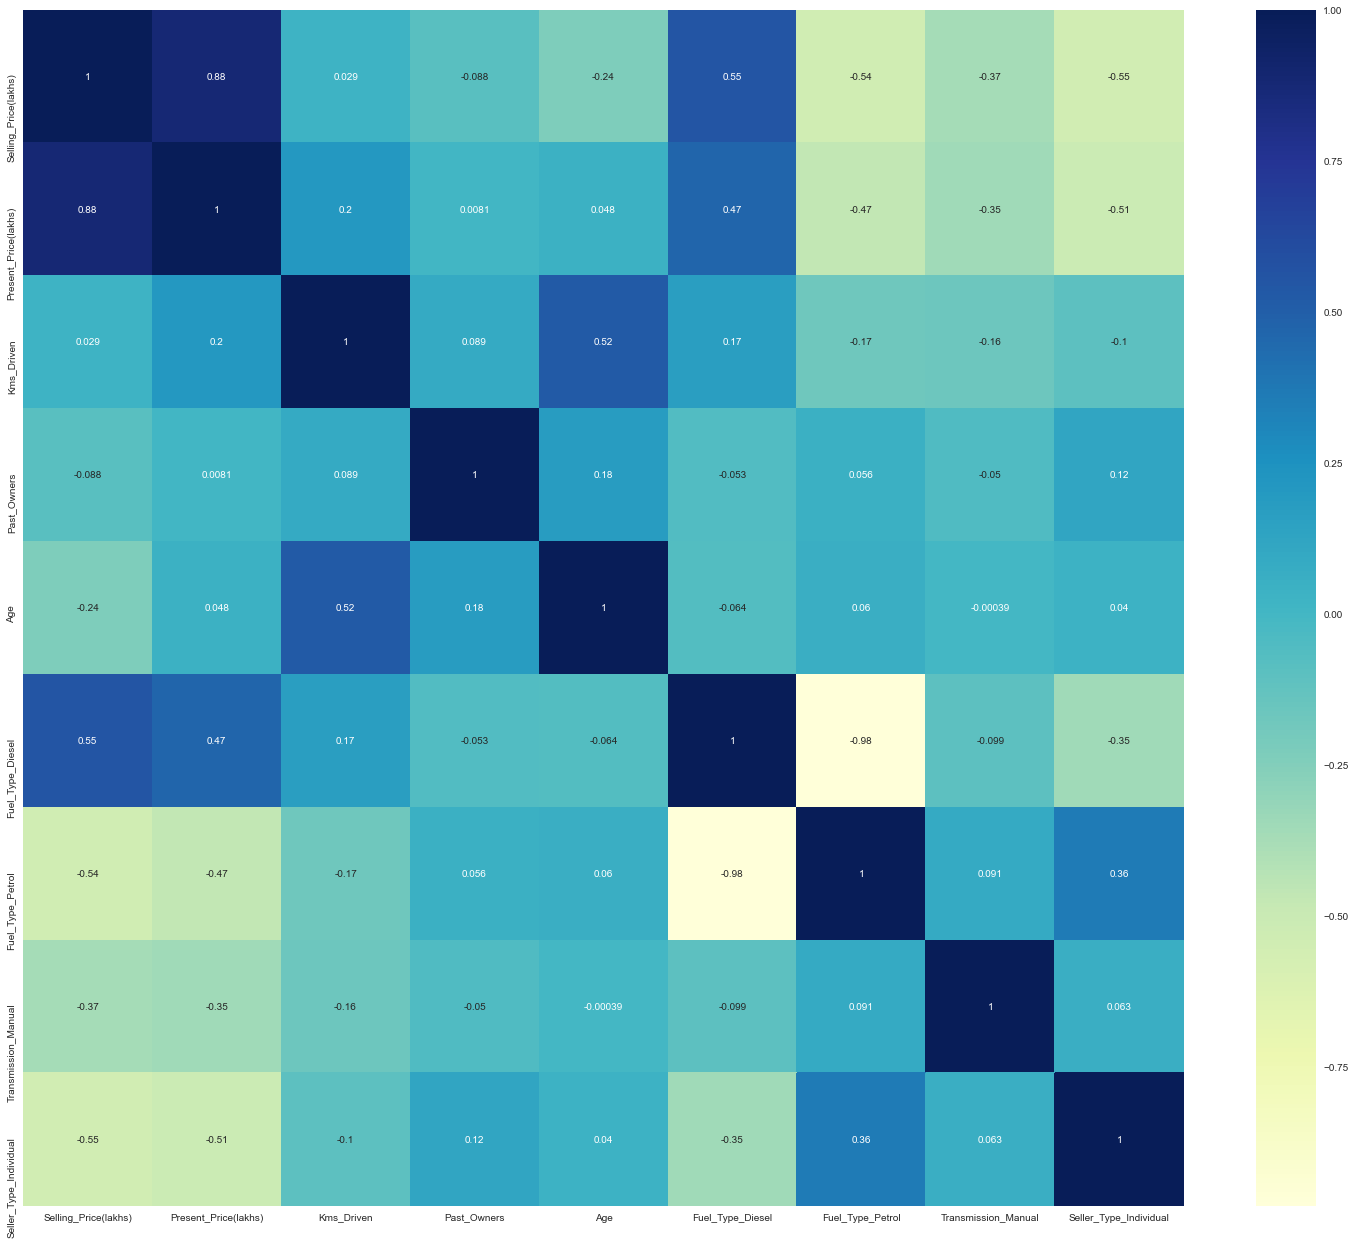

In [30]:
correlations=df.corr()

indx=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(df[indx].corr(),annot=True,cmap="YlGnBu")


### Train Test Split

Let's begin to train our Regression Model! We will split our data into train data that contains the part of dataset used for training data and test data used for testing data. 

In [31]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df, test_size=0.2, random_state=42)

We'll perform feature scaling to ensure normalization of the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [33]:
scale=['Selling_Price(lakhs)','Present_Price(lakhs)','Kms_Driven','Age']

In [34]:
#Scaling the train and test data
df_train[scale]=scaler.fit_transform(df_train[scale])
df_test[scale]=scaler.transform(df_test[scale])

In [35]:
X_test=df_test.drop(columns=['Selling_Price(lakhs)'],axis=1)
y_test=df_test['Selling_Price(lakhs)']

X_train=df_train.drop(columns=['Selling_Price(lakhs)'],axis=1)
y_train=df_train['Selling_Price(lakhs)']

## Training our Model

### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

Let's check the coefficients and interpret them

In [37]:
print(lr.intercept_)

0.16281082133294159


In [38]:
# temp here stores the numerical columns from the vehicles dataset that influence the prediction
temp=df.drop(columns=['Selling_Price(lakhs)'])

coeff_df=pd.DataFrame(lr.coef_,temp.columns,columns=['Coefficient'])
coeff_df 

,Coefficient
Present_Price(lakhs),0.748932
Kms_Driven,-0.050014
Past_Owners,-0.175771
Age,-0.198091
Fuel_Type_Diesel,0.492692
Fuel_Type_Petrol,0.143623
Transmission_Manual,-0.318770
Seller_Type_Individual,-0.231556


#### Interpreting the coefficients:
**For numerical features:**
* Holding all other features fixed, a 1 unit increase in Present_Price(lakhs) is associated with an increase of 0.748.
* Holding all other features fixed, a 1 unit increase in Kms_Driven is associated with a decrease of .05001.
* Holding all other features fixed, a 1 unit increase in Age means decrease by 0.19809.

### Predictions from our Model

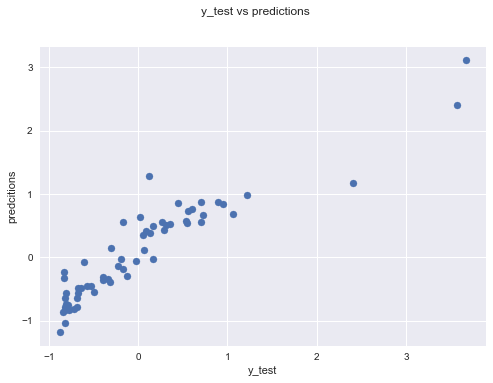

In [39]:
predictions=lr.predict(X_test)
fig=plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')
#X-label
plt.xlabel('y_test')
# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

#### Residual Histogram

Text(0.5, 0.98, 'Residual Analysis')

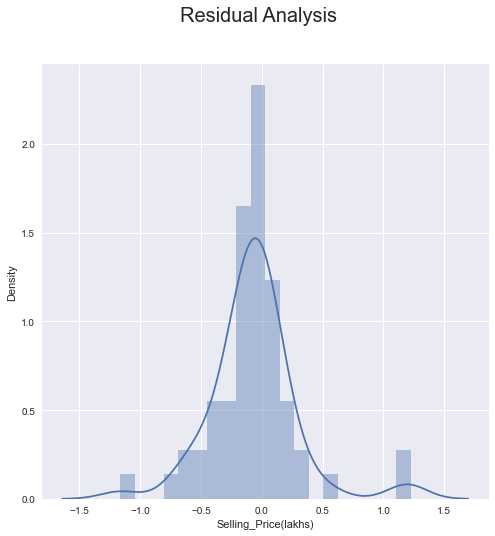

In [40]:
fig=plt.figure(figsize=(8,8)) 
sns.distplot((y_test-predictions),bins=20)
#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)           

#### Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

- **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors **MAE** is the easiest to understand, because it's the average error.
- **Mean Squared Error** (MSE) is the mean of the squared errors **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [41]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.23654164761136837
MSE: 0.1315881715879994
RMSE: 0.36275083954141224


In [42]:
R2=metrics.r2_score(y_test,predictions)
R2

0.8489813024899064

#### Saving the Model

In [43]:
#import pickle
#pickle.dump(lr, open('carprice_lr_model.pkl', 'wb'))

### XGBoost Regression

In [44]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
regressor=xgboost.XGBRegressor()

#### Tuning and Training the Model

In [45]:
#Hyperparamter_Tuning
n_estimators=[100, 500, 900, 1100, 1500]
max_depth=[2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [46]:
# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

#train on the RandomSearchCv object to get best estimators
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=3,
                   param

In [47]:
#getting the best estimators
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
#getting the best params
random_cv.best_params_

{'n_estimators': 900,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 1}

In [49]:
# reinitializing the regressor object with the best probable estimators
regressor = xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=np.nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
# fitting the xgbRegressor on our training data
regressor.fit(X_train,y_train)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Model Evaluation and Predictions

In [51]:
# fetching the predictions on our test data
predictions2=regressor.predict(X_test)

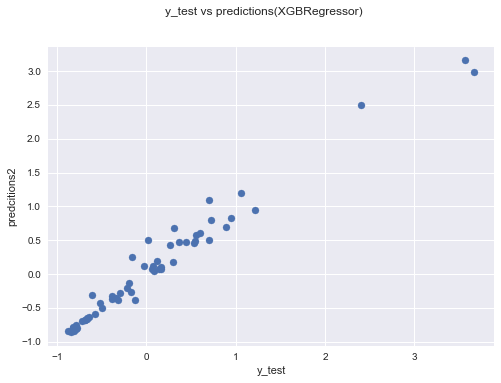

In [52]:
fig=plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions(XGBRegressor)')
#X-label
plt.xlabel('y_test')
# Y-label
plt.ylabel('predcitions2')
plt.scatter(y_test,predictions2)

#### Residual Analysis

Text(0.5, 0.98, 'Residual Analysis')

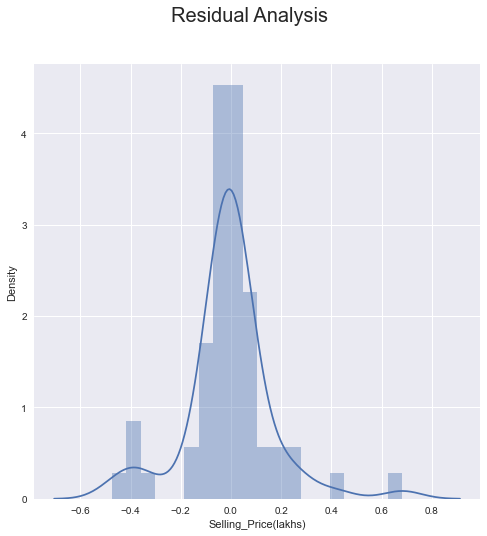

In [53]:
fig=plt.figure(figsize=(8,8))  
sns.distplot((y_test-predictions2),bins=20)
#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)           

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

MAE: 0.10312846006136372
MSE: 0.02987406301249062
RMSE: 0.17284114965045394


In [55]:
R2 = metrics.r2_score(y_test,predictions2)
R2

0.9657146836905192

### XGBRegressor performs considerably better than Linear Regression with a R2 score of 0.96571 compared to .84898.

### Saving The Model

In [56]:
import pickle
pickle.dump(regressor, open('carprice_regressor_model.pkl', 'wb'))

### Predicting a sample value

In [57]:
data = {'Year': 2018,
            'Present_Price': 9.890,
            'Kms_Driven': 20000,
            'Fuel_Type': 'Diesel',
            'Seller_Type': 'Dealer',
            'Transmission': 'Manual',
            'Owner': 0}
features = pd.DataFrame(data, index=[0])
features

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2018,9.89,20000,Diesel,Dealer,Manual,0


In [58]:
car_df_raw = pd.read_csv('car data.csv')
car_df = car_df_raw.drop(columns = ['Selling_Price', 'Car_Name'])
df_test = pd.concat([features, car_df], axis=0)

In [59]:
df_test['Age'] = 2022-df_test['Year']
df_test.drop('Year', axis=1, inplace=True)

In [60]:
df_test.rename(columns={'Owner':'Past_Owners'}, inplace = True)

In [61]:
df_test=pd.get_dummies(data=df_test,columns=['Fuel_Type', 'Transmission', 'Seller_Type'], drop_first=True)

In [62]:
df_test = df_test[:1]
df_test

,Present_Price,Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,9.89,20000,0,4,1,0,1,0


In [63]:
regressor.predict(df_test)

array([5.331053], dtype=float32)